In [43]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.1


In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist #Download fashion_mnist dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #Setzt die einzelnen Klassen namen

In [46]:
train_images.shape #Gibt die anzahl und größe der Train Bilder aus

(60000, 28, 28)

In [47]:
len(train_labels) #Gibt die anzahl an Train Beschriftungen aus

60000

In [48]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [49]:
test_images.shape #Gibt die anzahl und größe der Test Bilder aus

(10000, 28, 28)

In [50]:
len(test_labels) #Gibt die anzahl an Test Beschriftungen aus

10000

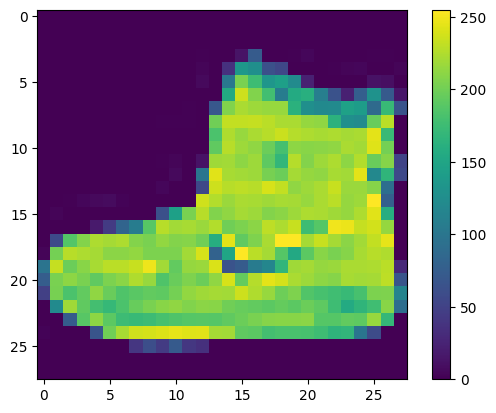

In [51]:
plt.figure() #Macht eine Figur
plt.imshow(train_images[0]) #Zeigt das Training Bild mit dem index 0
plt.colorbar() #Zeigt eine Farbbalken
plt.grid(False) #Setzt das Zeigen vom Gitter auf false
plt.show() #Zeigt das Bild

In [52]:
train_images = train_images / 255.0 #Train Bilder = Train Bilder durch 255.0

test_images = test_images / 255.0 #Test Bilder = Test Bilder durch 255.0

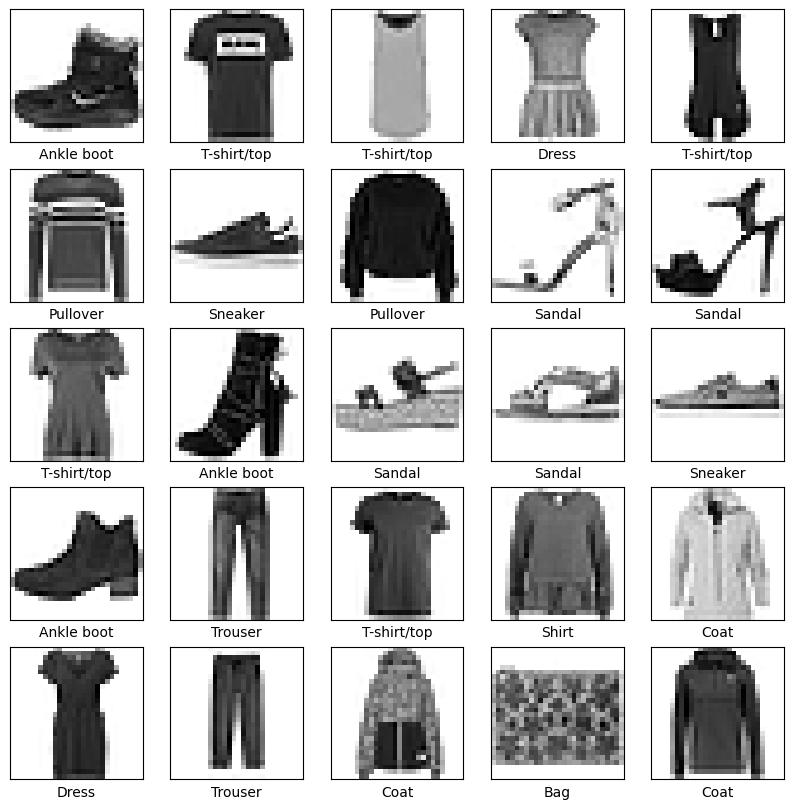

In [53]:
plt.figure(figsize=(10,10)) #Macht eine Figur mit der größe 10 x 10
for i in range(25): #Solange i kleiner oder gleich 25 ist
    plt.subplot(5,5,i+1) #mache Bilder in 5 Reihen und 5 Zeilen das Bild mit Index i + 1
    plt.xticks([]) #Gibt die x location zurück
    plt.yticks([]) #Gibt die y location zurück
    plt.grid(False) #Setzt das Zeigen von Gitter auf false
    plt.imshow(train_images[i], cmap=plt.cm.binary) #Zeigt es in einer Collormap (Graustufen)
    plt.xlabel(class_names[train_labels[i]]) #Zeigt die Beschriftungen unter den Bildern
plt.show() #Zeigt die Figur

In [54]:
model = tf.keras.Sequential([ #Erstellt ein keras model
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Input Layer  der das Bild glatt und setzt die größe zu 28 x 28 pixel
    tf.keras.layers.Dense(128, activation='relu'), #Hidden Layer  mit 128 Neuronen  Aktivierungsfunction ReLU (Rectified Linear Unit)
    tf.keras.layers.Dense(10) #Output Layer  mit 10 Neuronen wegen den 10 Kategorien
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(optimizer='adam', #Kontroliert, wie die Gewichte angepasst werden (adam ist das beliebteste)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #Funktion, um den Unterschied zwischen den ergebnissen von der KI und den wirklichen Werten
              metrics=['accuracy']) #Definiert, wie gut die KI ist

In [56]:
model.fit(train_images, train_labels, epochs=50) #Trainniert die KI 50 mal durchs ganze Training set

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7777 - loss: 0.6385
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8640 - loss: 0.3790
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8745 - loss: 0.3424
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8844 - loss: 0.3160
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8951 - loss: 0.2855
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8977 - loss: 0.2754
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9041 - loss: 0.2614
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9068 - loss: 0.2492
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9088 - loss: 0.2434
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9109 - loss: 0.2384
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9178 - loss: 0.2254
Epoch 12/50
1875/1875 ━━━━━━━

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #Geht einmal durchs Test set

print('\nTest accuracy:', test_acc) #Gibt die genauigkeit der KI aus

313/313 - 0s - 2ms/step - accuracy: 0.8826 - loss: 0.5200

Test accuracy: 0.8826000094413757


In [58]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()]) #Fügt die layers zusammen und fügt den Softmax layer hinzu

In [59]:
predictions = probability_model.predict(test_images) #Mach die Erwartung für alle Test bilder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [60]:
predictions[0] #gibt die Erwartung vom Test Bild mit dem index 0 aus

array([2.2780717e-14, 1.5516460e-27, 2.5444751e-23, 1.6530683e-26,
       2.0327721e-20, 1.9204086e-10, 2.8888048e-16, 9.8797625e-07,
       5.4571596e-16, 9.9999899e-01], dtype=float32)

In [61]:
np.argmax(predictions[0]) #Gibt den Index des größten Werts aus

9

In [62]:
test_labels[0] #Gibt den korrekten Wert aus

9

In [63]:
def plot_image(i, predictions_array, true_label, img):  #Definiert plot_image
    true_label, img = true_label[i], img[i]             #True_label und Bild für true_label mit index i, Bild mit index i
    plt.grid(False)                                     #Setzt das Zeigen vom Gitter auf false
    plt.xticks([])                                      #Gibt die x location zurück
    plt.yticks([])                                      #Gibt die y location zurück

    plt.imshow(img, cmap=plt.cm.binary)                 #Gibt das Bild in einer Collormap (Graustufen)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

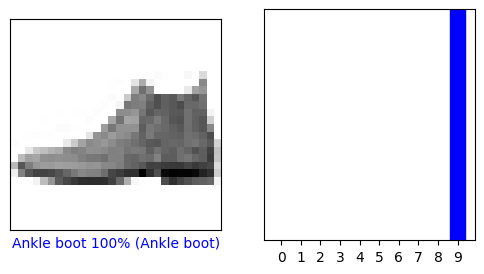

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

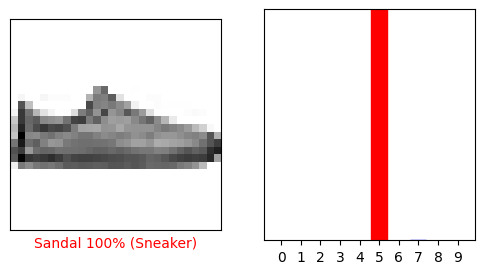

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

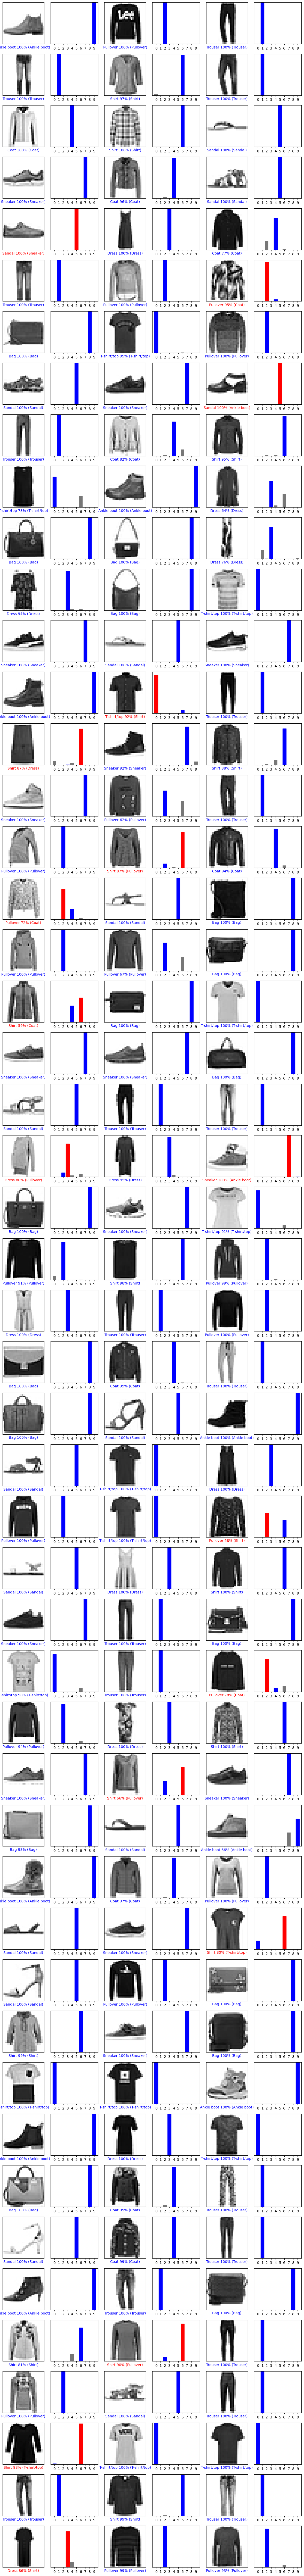

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 50
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [80]:
img = test_images[111]
i = 111

print(img.shape)

(28, 28)


In [81]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [82]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[2.4261528e-30 0.0000000e+00 1.6386160e-35 0.0000000e+00 9.9679394e-22
  1.0000000e+00 5.3374620e-32 3.8964236e-20 7.4983179e-23 0.0000000e+00]]


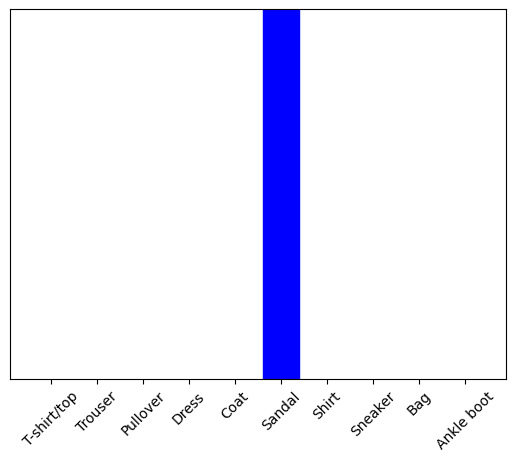

In [83]:
plot_value_array(i, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [84]:
np.argmax(predictions_single[0])

5

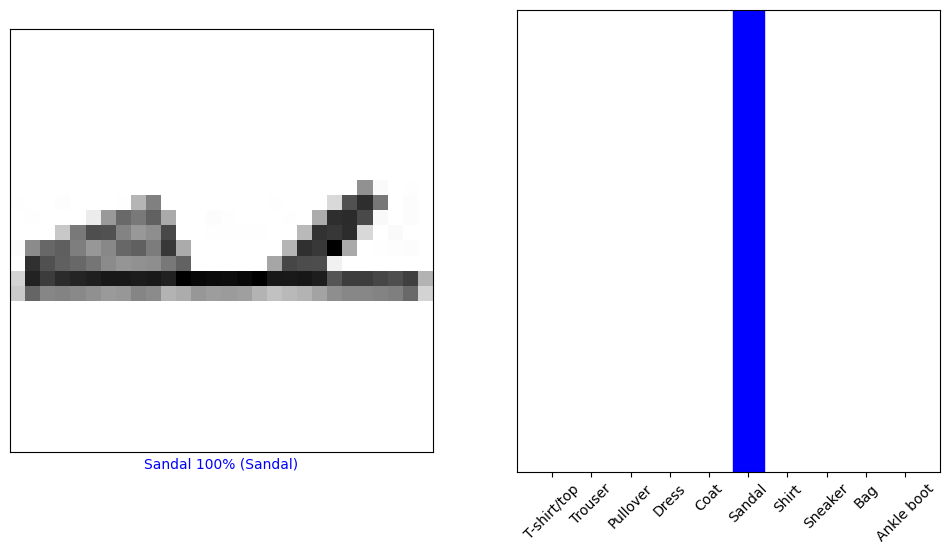

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions_single[0], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_single[0],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()